###todo: add more variables from public data : time?
###change settings on SVR

### Sky cover, relative humidity, precipitation, temperature, dew point, wind speed

Short term weather forecasts for next day as well as for next three days

 Photovoltaic, meteorological and radiative measurements at SIRTA
 ####Col 7: Measured solar irradiance on the plane of the panels (27.7�)(zone 1)
 ####Col 12: 2-m Air temperature (zone 1)
 ####Col 14: 10-m Wind speed (zone 1)
 
Tuning hyper-parameters for R^2 Score (time irr)
Best parameters set found on development set:
{'gamma': 0.001, 'C': 10, 'kernel': 'rbf'}
Detailed report:
0.178399326674

### Tuning hyper-parameters for R2 Score (irr p1)
Best parameters set found on development set:
{'C': 10, 'kernel': 'rbf', 'gamma': 1}
R2 Score:
0.965792921757

In [1]:
# IMPORT MODULES

%matplotlib inline

import datetime
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as dts
import calendar

import sklearn.preprocessing as pp
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import r2_score

import pandas as pd

In [2]:
# READ DATA
data = pd.read_csv("DonneesMeteo.txt", sep=" ", header=1)
data["Date"] = pd.to_datetime(data["Date"], format="%Y%m%d")
#data["hh(UTC)"] = pd.to_datetime(data["hh(UTC)"], format="%H.")
data.corr()["IrrPOA(W/m2)"].copy
'''
print(data.columns.values.tolist())


plt.xlabel('Time')
plt.ylabel('Irradiance')
plt.scatter(data["hh(UTC)"], data["IrrPOA(W/m2)"], c='k', label='data')
plt.show()

plt.xlabel('Temperature')
plt.ylabel('Irradiance')
plt.scatter(data["T(C)"], data["IrrPOA(W/m2)"], c='k', label='data')
plt.show()

plt.xlabel('Wind Speed')
plt.ylabel('Irradiance')
plt.scatter(data["WS(m/s)"], data["IrrPOA(W/m2)"], c='k', label='data')
plt.show()
'''

'\nprint(data.columns.values.tolist())\n\n\nplt.xlabel(\'Time\')\nplt.ylabel(\'Irradiance\')\nplt.scatter(data["hh(UTC)"], data["IrrPOA(W/m2)"], c=\'k\', label=\'data\')\nplt.show()\n\nplt.xlabel(\'Temperature\')\nplt.ylabel(\'Irradiance\')\nplt.scatter(data["T(C)"], data["IrrPOA(W/m2)"], c=\'k\', label=\'data\')\nplt.show()\n\nplt.xlabel(\'Wind Speed\')\nplt.ylabel(\'Irradiance\')\nplt.scatter(data["WS(m/s)"], data["IrrPOA(W/m2)"], c=\'k\', label=\'data\')\nplt.show()\n'

In [3]:
dataset = np.array(data[["hh(UTC)", "IrrPOA(W/m2)", "P1(W)"]]).astype(np.float)

#Remove nan and infinite values
masknan = ~np.any(np.isnan(dataset), axis=1)
dataset = dataset[masknan]
maskfin = np.any(np.isfinite(dataset), axis=1)
dataset = dataset[maskfin]
X=dataset[:,0:2]
y=dataset[:,2]

X = np.reshape(X,(len(X),2))

#SCALE INDEPENDENT DATA - no need here, because time is regular?
X=pp.StandardScaler().fit_transform(X)

In [4]:
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

parameters = [{'kernel': ['rbf'], 'gamma': [1, 1e-1, 1e-2, 1e-3, 1e-4], 'C': [1, 10, 100]}]

In [5]:
print("# Tuning hyper-parameters for R2 Score")

clf = GridSearchCV(SVR(C=1), parameters, scoring='r2')
clf.fit(X_training, y_training)

print("Best parameters set found on development set:")
print(clf.best_params_)

print("R2 Score:")
y_true, y_pred = y_test, clf.predict(X_test)
print(r2_score(y_true, y_pred))

# Tuning hyper-parameters for R2 Score
Best parameters set found on development set:
{'C': 10, 'kernel': 'rbf', 'gamma': 1}
R2 Score:
0.965792921757
Grid Scores:


AttributeError: 'GridSearchCV' object has no attribute 'grid_scores'

(4989,)
(4989,)


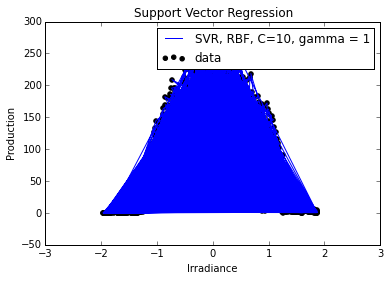

(4989,)
(4989,)


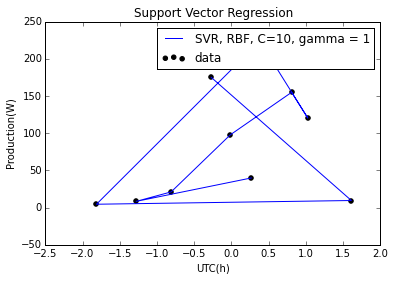

In [14]:
print(np.shape(X_test[:,0]))
print(np.shape(y_pred))
plt.plot(X_test[:,0], y_pred, c='r', label='SVR, RBF, C=10, gamma = 1')
#plt.hold('on')

plt.scatter(X_test[:,0], y_pred, c='k', label='data')
plt.xlabel('Irradiance')
plt.ylabel('Production')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

print(np.shape(X_test[:,1]))
print(np.shape(y_pred))
plt.plot(X_test[0:10,0], y_pred[0:10], c='b', label='SVR, RBF, C=10, gamma = 1')
#plt.hold('on')

plt.scatter(X_test[0:10,0], y_pred[0:10], c='k', label='data')
plt.xlabel('UTC(h)')
plt.ylabel('Production(W)')
plt.title('Support Vector Regression')
plt.legend()
plt.show()